In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import sys
sys.path.append("../../scripts/")
sys.path.append("../../config/")
from utils.load_save import *
from utils.utils import *
from models.FloweringModel import FloweringModel
from definitions import ROOT_DIR
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [2]:
#import train and test data
train = load_data('train_test','train', sorghum = True)
test  = load_data('train_test', 'test', sorghum = True)

In [3]:
## Initialize Models with default parameters

In [ ]:
#optimal trees

In [48]:
#run models
results_test = []
results_train= []
for trees in range(1,101,1):
    rf = RandomForestRegressor(n_estimators = trees)
    model = (f"RF-{trees}-trees",rf)
    fm = FloweringModel(model, train,test)
    fm.fit()
    results = fm.evaluate()
    results_test.append(results[0])
    results_train.append(results[1])
    #print(f"Done: {model[1]}")
df_results_test = pd.concat(results_test)
df_results_train= pd.concat(results_train)

In [ ]:
#save_table(df_results_test,f"{ROOT_DIR}/figures/initial_sorghum_models_test_results.tex")

<AxesSubplot:xlabel='Feature', ylabel='R^2-train'>

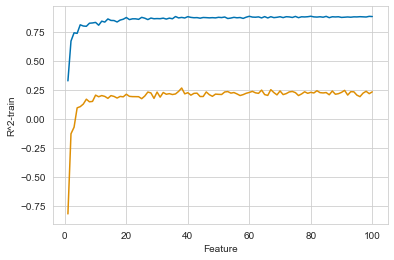

In [49]:
plot_data = pd.DataFrame.from_dict({
    "R^2-train":df_results_train['R^2'],
    "R^2-test": df_results_test['R^2'],
    "Feature": list( range(1,101,1))
})
plot_data.reset_index(inplace = True)
sns.lineplot(data = plot_data, x = "Feature", y ="R^2-train")
sns.lineplot(data = plot_data, x = "Feature", y ="R^2-test")

In [ ]:
#optimal max-depth

In [51]:
#run models
results_test = []
results_train= []
for mf in range(1,51,1) :
    rf = RandomForestRegressor(n_estimators = 13, max_features = 'sqrt', max_depth = mf, bootstrap = True)
    model = (f"RF-{mf}-max-features",rf)
    fm = FloweringModel(model, train,test)
    fm.fit()
    results = fm.evaluate()
    results_test.append(results[0])
    results_train.append(results[1])
df_results_test = pd.concat(results_test)
df_results_train= pd.concat(results_train)

<AxesSubplot:xlabel='Feature', ylabel='R^2-train'>

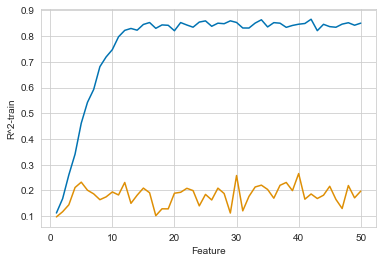

In [52]:
plot_data = pd.DataFrame.from_dict({
    "R^2-train":df_results_train['R^2'],
    "R^2-test": df_results_test['R^2'],
    "Feature": list( range(1,51,1))
})
plot_data.reset_index(inplace = True)
sns.lineplot(data = plot_data, x = "Feature", y ="R^2-train")
sns.lineplot(data = plot_data, x = "Feature", y ="R^2-test")

In [ ]:
#optimal min samples split

In [54]:
#run models
results_test = []
results_train= []
for mss in range(2,11,1):
    rf = RandomForestRegressor(n_estimators = 13, max_features = 'sqrt', max_depth = 15,
                              min_samples_split = mss, bootstrap = True)
    model = (f"RF-{mss}-min-samples-split",rf)
    fm = FloweringModel(model, train,test)
    fm.fit()
    results = fm.evaluate()
    results_test.append(results[0])
    results_train.append(results[1])
df_results_test = pd.concat(results_test)
df_results_train= pd.concat(results_train)

<AxesSubplot:xlabel='Feature', ylabel='R^2-train'>

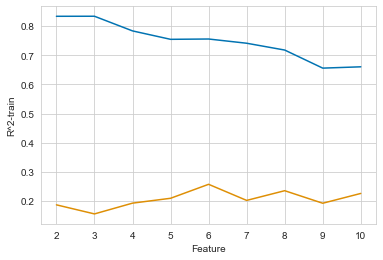

In [56]:
plot_data = pd.DataFrame.from_dict({
    "R^2-train":df_results_train['R^2'],
    "R^2-test": df_results_test['R^2'],
    "Feature": list( range(2,11,1))
})
plot_data.reset_index(inplace = True)
sns.lineplot(data = plot_data, x = "Feature", y ="R^2-train")
sns.lineplot(data = plot_data, x = "Feature", y ="R^2-test")

In [ ]:
#optimal min samples leaf

In [58]:
#run models
results_test = []
results_train= []
for msl in range(2,11,1):
    rf = RandomForestRegressor(n_estimators = 13, max_features = 'sqrt', max_depth = 15,
                              min_samples_split = 6, min_samples_leaf = msl, bootstrap = True)
    model = (f"RF-{msl}-min-sample-leaf",rf)
    fm = FloweringModel(model, train,test)
    fm.fit()
    results = fm.evaluate()
    results_test.append(results[0])
    results_train.append(results[1])
df_results_test = pd.concat(results_test)
df_results_train= pd.concat(results_train)

<AxesSubplot:xlabel='Feature', ylabel='R^2-train'>

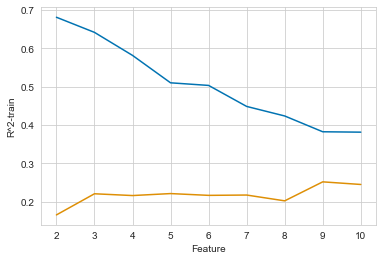

In [59]:
plot_data = pd.DataFrame.from_dict({
    "R^2-train":df_results_train['R^2'],
    "R^2-test": df_results_test['R^2'],
    "Feature": list( range(2,11,1))
})
plot_data.reset_index(inplace = True)
sns.lineplot(data = plot_data, x = "Feature", y ="R^2-train")
sns.lineplot(data = plot_data, x = "Feature", y ="R^2-test")

In [64]:
results_test = []
results_train= []
rf = RandomForestRegressor(n_estimators = 13, max_features = 'sqrt', max_depth = 15,
                          min_samples_split = 6, min_samples_leaf = 3, bootstrap = True)
#rf = RandomForestRegressor()
model = (f"RF-{msl}-min-sample-leaf",rf)
fm = FloweringModel(model, train,test)
fm.fit()
results = fm.evaluate()
results_test.append(results[0])
results_train.append(results[1])
df_results_test = pd.concat(results_test)
df_results_train= pd.concat(results_train)

In [65]:
df_results_test, df_results_train

(                   Model       R^2       MAE      RMSE
 0  RF-10-min-sample-leaf  0.239496  4.893698  6.219718,
                    Model       R^2       MAE      RMSE
 0  RF-10-min-sample-leaf  0.680339  2.906703  3.747466)